<a href="https://colab.research.google.com/github/WardaAli-00/Programming-For-Ai-Assignment/blob/main/ASSIGNMENT_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import time

import warnings
warnings.filterwarnings('ignore')

### ***Loading Data***

In [63]:
df = pd.read_csv('/content/drive/MyDrive/Breast_Cancer_Gene_Expression_Profiles (1).csv', low_memory = False)
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0


In [64]:
clinic_data = df.loc[:, df.columns[:31]]
clinic_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [65]:
genomic_data = df.loc[:, df.columns[31:]]
genomic_data.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,0,0,0,0,0,0,0,0,0,0
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0,0,0,0,0,0,0,0,0,0
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0,0,0,0,0,0,0,0,0,0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,0,0,0,0,0,0,0,0,0,0
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,0,0,0,0,0,0,0,0,0,0


### **Detecting Missing Values**

In [66]:
missing_genomic = genomic_data.isnull().sum().sort_values(ascending=False).rename('total_null')\
                  .to_frame().sort_values(by='total_null', ascending=False)
missing_genomic.head()

,total_null
brca1,0
rb1,0
rad50,0
palb2,0
pten,0


## ***For Clinical Data***

In [67]:
missing_clinic = clinic_data.isnull().sum().sort_values(ascending=False).rename('total_null')\
                  .to_frame().sort_values(by='total_null', ascending=False)
missing_clinic.head(14)

,total_null
tumor_stage,501
3-gene_classifier_subtype,204
primary_tumor_laterality,106
neoplasm_histologic_grade,72
cellularity,54
mutation_count,45
er_status_measured_by_ihc,30
type_of_breast_surgery,22
tumor_size,20
oncotree_code,15


In [68]:
total = 0
for i in missing_clinic['total_null']:
    total += i
print(total)

1100


In [69]:
clinic_data.shape # 1904 rows and 31 columns

(1904, 31)

### ***Filling the Missing Values***

In [70]:
for column in missing_clinic.index[:13]:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [71]:
df.isnull().sum().value_counts() # This shows that 693 columns have no missing values

,count
0,693


In [73]:
df.shape

(1904, 693)

### ***Working with the Target Variable***

In [74]:
counts = df['death_from_cancer'].value_counts()
print(counts)

death_from_cancer
Living                  802
Died of Disease         622
Died of Other Causes    480
Name: count, dtype: int64


### ***Label Encoding (Ordinal)***

In [75]:
ordinal_df = df[['cellularity','cancer_type_detailed','type_of_breast_surgery',
                       'pam50_+_claudin-low_subtype', 'integrative_cluster',
                       'her2_status_measured_by_snp6','tumor_other_histologic_subtype',
                       '3-gene_classifier_subtype', 'death_from_cancer']]
ordinal_df.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,pam50_+_claudin-low_subtype,integrative_cluster,her2_status_measured_by_snp6,tumor_other_histologic_subtype,3-gene_classifier_subtype,death_from_cancer
0,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,claudin-low,4ER+,NEUTRAL,Ductal/NST,ER-/HER2-,Living
1,High,Breast Invasive Ductal Carcinoma,BREAST CONSERVING,LumA,4ER+,NEUTRAL,Ductal/NST,ER+/HER2- High Prolif,Living
2,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,LumB,3,NEUTRAL,Ductal/NST,ER+/HER2- Low Prolif,Died of Disease
3,Moderate,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,LumB,9,NEUTRAL,Mixed,ER+/HER2- Low Prolif,Living
4,High,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,LumB,9,NEUTRAL,Mixed,ER+/HER2- High Prolif,Died of Disease


In [76]:
ordinal_df = ordinal_df.apply(LabelEncoder().fit_transform)
ordinal_df.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,pam50_+_claudin-low_subtype,integrative_cluster,her2_status_measured_by_snp6,tumor_other_histologic_subtype,3-gene_classifier_subtype,death_from_cancer
0,0,1,1,6,4,2,0,2,2
1,0,1,0,2,4,2,0,0,2
2,0,1,1,3,3,2,0,1,0
3,2,4,1,3,10,2,4,1,2
4,0,4,1,3,10,2,4,0,0


### ***One Hot Encoding (Nominal)***

In [77]:
nominal_df = df[['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code']]
nominal_df.head()

,er_status_measured_by_ihc,er_status,her2_status,inferred_menopausal_state,primary_tumor_laterality,pr_status,oncotree_code
0,Positve,Positive,Negative,Post,Right,Negative,IDC
1,Positve,Positive,Negative,Pre,Right,Positive,IDC
2,Positve,Positive,Negative,Pre,Right,Positive,IDC
3,Positve,Positive,Negative,Pre,Right,Positive,MDLC
4,Positve,Positive,Negative,Post,Right,Positive,MDLC


In [78]:
nominal_df = pd.get_dummies(data = nominal_df, drop_first= True)
nominal_df.head()

,er_status_measured_by_ihc_Positve,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,True,True,False,False,True,False,True,False,False,False,False
1,True,True,False,True,True,True,True,False,False,False,False
2,True,True,False,True,True,True,True,False,False,False,False
3,True,True,False,True,True,True,False,False,False,False,True
4,True,True,False,False,True,True,False,False,False,False,True


### ***Adding the ordinal_df***

In [79]:
df.drop(ordinal_df.columns, axis = 1, inplace = True)
df = df.join(ordinal_df)
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status,hormone_therapy,...,siah1_mut,cellularity,cancer_type_detailed,type_of_breast_surgery,pam50_+_claudin-low_subtype,integrative_cluster,her2_status_measured_by_snp6,tumor_other_histologic_subtype,3-gene_classifier_subtype,death_from_cancer
0,0,75.65,Breast Cancer,0,1,Positve,Positive,3.0,Negative,1,...,0,0,1,1,6,4,2,0,2,2
1,2,43.19,Breast Cancer,0,1,Positve,Positive,3.0,Negative,1,...,0,0,1,0,2,4,2,0,0,2
2,5,48.87,Breast Cancer,1,1,Positve,Positive,2.0,Negative,1,...,0,0,1,1,3,3,2,0,1,0
3,6,47.68,Breast Cancer,1,1,Positve,Positive,2.0,Negative,1,...,0,2,4,1,3,10,2,4,1,2
4,8,76.97,Breast Cancer,1,1,Positve,Positive,3.0,Negative,1,...,0,0,4,1,3,10,2,4,0,0


### ***Adding the nominal_df***

In [80]:
df.drop(['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code'], axis = 1, inplace = True)
df = df.join(nominal_df)
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,75.65,Breast Cancer,0,1,3.0,1,10,5.0,6.044,...,True,False,False,True,False,True,False,False,False,False
1,2,43.19,Breast Cancer,0,1,3.0,1,0,2.0,4.020,...,True,False,True,True,True,True,False,False,False,False
2,5,48.87,Breast Cancer,1,1,2.0,1,1,2.0,4.030,...,True,False,True,True,True,True,False,False,False,False
3,6,47.68,Breast Cancer,1,1,2.0,1,3,1.0,4.050,...,True,False,True,True,True,False,False,False,False,True
4,8,76.97,Breast Cancer,1,1,3.0,1,8,2.0,6.080,...,True,False,False,True,True,False,False,False,False,True


In [82]:
df.isnull().sum().sum()

0

### ***Rounding Age of Patients***

In [83]:
df[['age_at_diagnosis','nottingham_prognostic_index']] = df[['age_at_diagnosis','nottingham_prognostic_index']].apply(np.ceil)

In [85]:
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,76.0,Breast Cancer,0,1,3.0,1,10,5.0,7.0,...,True,False,False,True,False,True,False,False,False,False
1,2,44.0,Breast Cancer,0,1,3.0,1,0,2.0,5.0,...,True,False,True,True,True,True,False,False,False,False
2,5,49.0,Breast Cancer,1,1,2.0,1,1,2.0,5.0,...,True,False,True,True,True,True,False,False,False,False
3,6,48.0,Breast Cancer,1,1,2.0,1,3,1.0,5.0,...,True,False,True,True,True,False,False,False,False,True
4,8,77.0,Breast Cancer,1,1,3.0,1,8,2.0,7.0,...,True,False,False,True,True,False,False,False,False,True


### ***Dropping Columns***

In [86]:
df.drop(['patient_id','cancer_type'], axis=1, inplace=True)

In [87]:
df.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,76.0,0,1,3.0,1,10,5.0,7.0,140.500000,1,...,True,False,False,True,False,True,False,False,False,False
1,44.0,0,1,3.0,1,0,2.0,5.0,84.633333,1,...,True,False,True,True,True,True,False,False,False,False
2,49.0,1,1,2.0,1,1,2.0,5.0,163.700000,0,...,True,False,True,True,True,True,False,False,False,False
3,48.0,1,1,2.0,1,3,1.0,5.0,164.933333,1,...,True,False,True,True,True,False,False,False,False,True
4,77.0,1,1,3.0,1,8,2.0,7.0,41.366667,0,...,True,False,False,True,True,False,False,False,False,True


### ***Finding Correlation between the Numerical Clinical Data***

In [89]:
new_clinic_data = df[df.columns[:25]]
new_clinic_data.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1
0,76.0,0,1,3.0,1,10,5.0,7.0,140.500000,1,...,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201
1,44.0,0,1,3.0,1,0,2.0,5.0,84.633333,1,...,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390
2,49.0,1,1,2.0,1,1,2.0,5.0,163.700000,0,...,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721
3,48.0,1,1,2.0,1,3,1.0,5.0,164.933333,1,...,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010
4,77.0,1,1,3.0,1,8,2.0,7.0,41.366667,0,...,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320


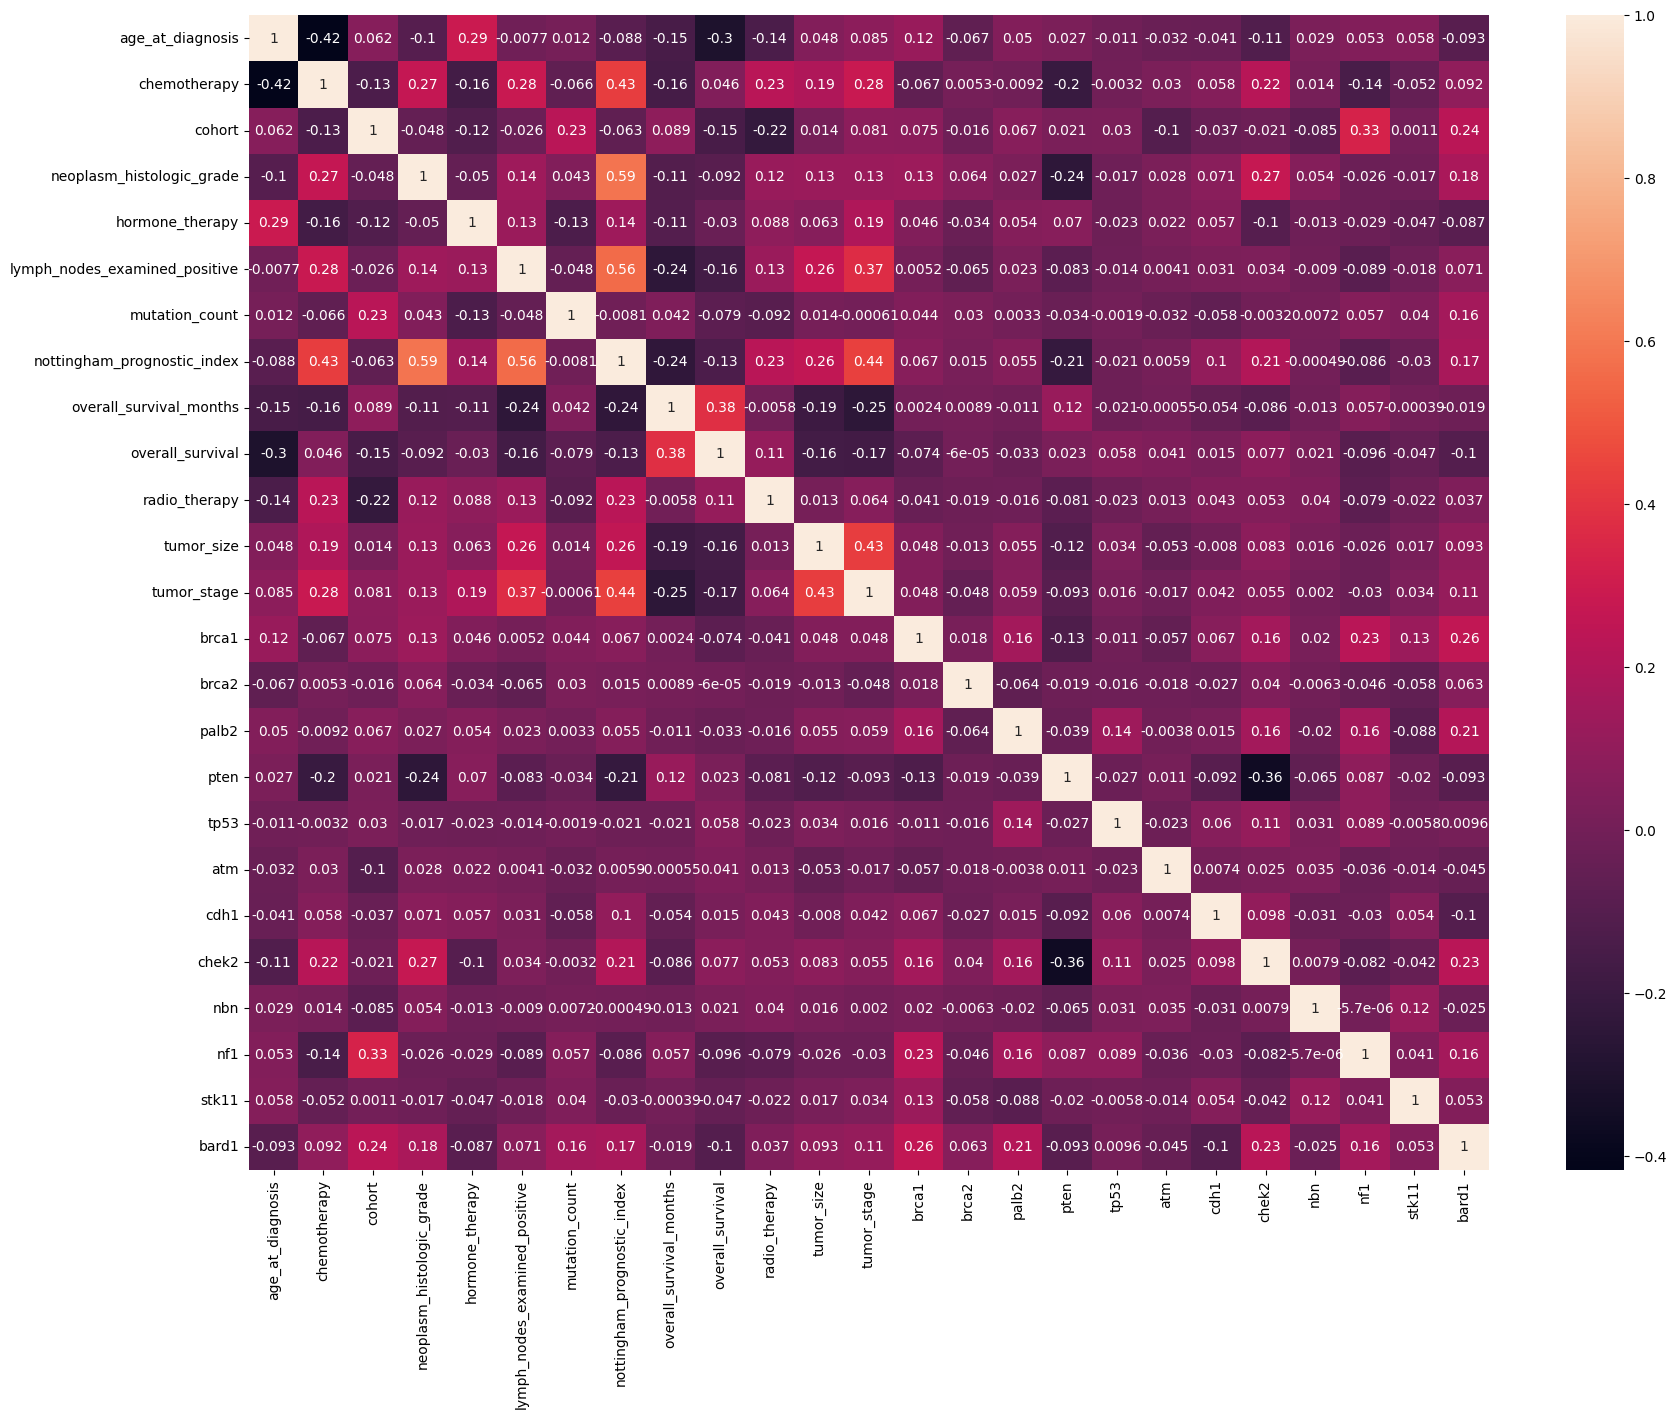

In [32]:
corr_matrix = new_clinic_data.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### ***Finding if the Clinical Data is Linear or not***

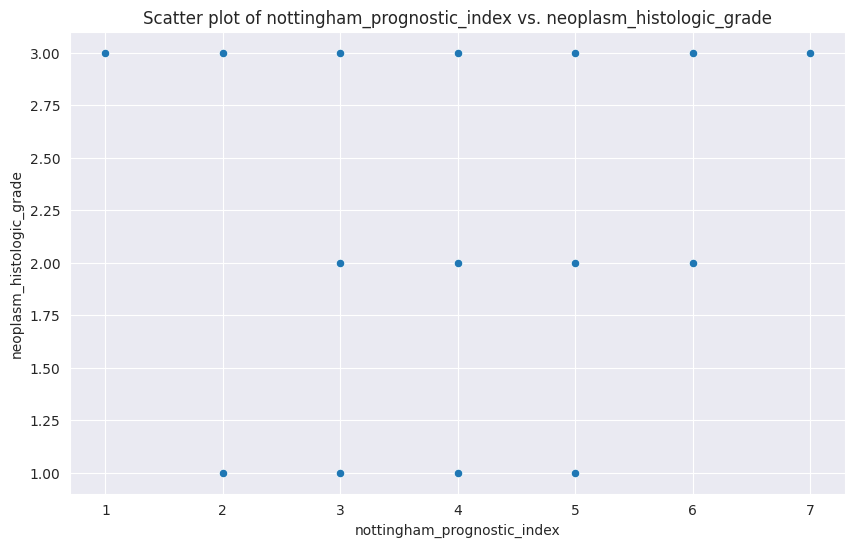

In [90]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(x='nottingham_prognostic_index', y='neoplasm_histologic_grade', data=new_clinic_data)

plt.title('Scatter plot of nottingham_prognostic_index vs. neoplasm_histologic_grade')
plt.xlabel('nottingham_prognostic_index')
plt.ylabel('neoplasm_histologic_grade')

plt.show()

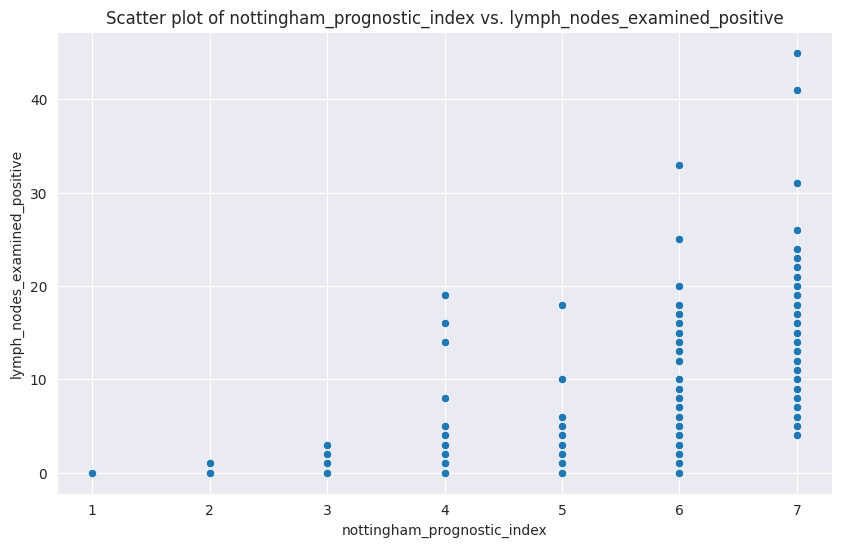

In [91]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(x='nottingham_prognostic_index', y='lymph_nodes_examined_positive', data= new_clinic_data)

plt.title('Scatter plot of nottingham_prognostic_index vs. lymph_nodes_examined_positive')
plt.xlabel('nottingham_prognostic_index')
plt.ylabel('lymph_nodes_examined_positive')

plt.show()

### ***Updating the Dataset***

In [92]:
new_df = df.drop(new_clinic_data.columns, axis = 1, inplace = False)
new_df = new_df.join(new_clinic_data)
new_df.isnull().sum().sum()

0

In [93]:
new_df.shape

(1904, 695)

### ***Genomic Data***

In [94]:
genomic_data = new_df.loc[:, new_df.dtypes == object]
genomic_data.head()

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# Converting all of the categorical values into binary
genomic_col = genomic_data.columns
for col in genomic_col:
    new_df.loc[new_df[col] != '0', col] = 1
    new_df.loc[new_df[col] == '0', col] = 0
new_df.head()

,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,...,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1
0,-0.4844,-0.7483,-1.6660,-0.1250,-0.3721,-0.6508,-0.1278,1.7330,-0.2770,-1.0673,...,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201
1,1.2266,0.7612,0.1821,1.0104,0.5600,-0.4018,-0.2909,0.7440,-1.7488,0.4602,...,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390
2,-1.7910,3.0955,0.6608,2.6127,2.5553,-0.0391,-0.4421,1.4528,1.4142,0.3143,...,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721
3,-1.3905,4.8798,0.0615,2.9414,4.1161,-0.3098,-1.3470,1.2102,1.5345,-0.6347,...,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010
4,-0.3582,0.3032,0.8747,0.6323,0.3349,-0.2652,-0.1541,-0.7631,1.0158,1.8996,...,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320


### ***Checking correlation for Genomic Data***

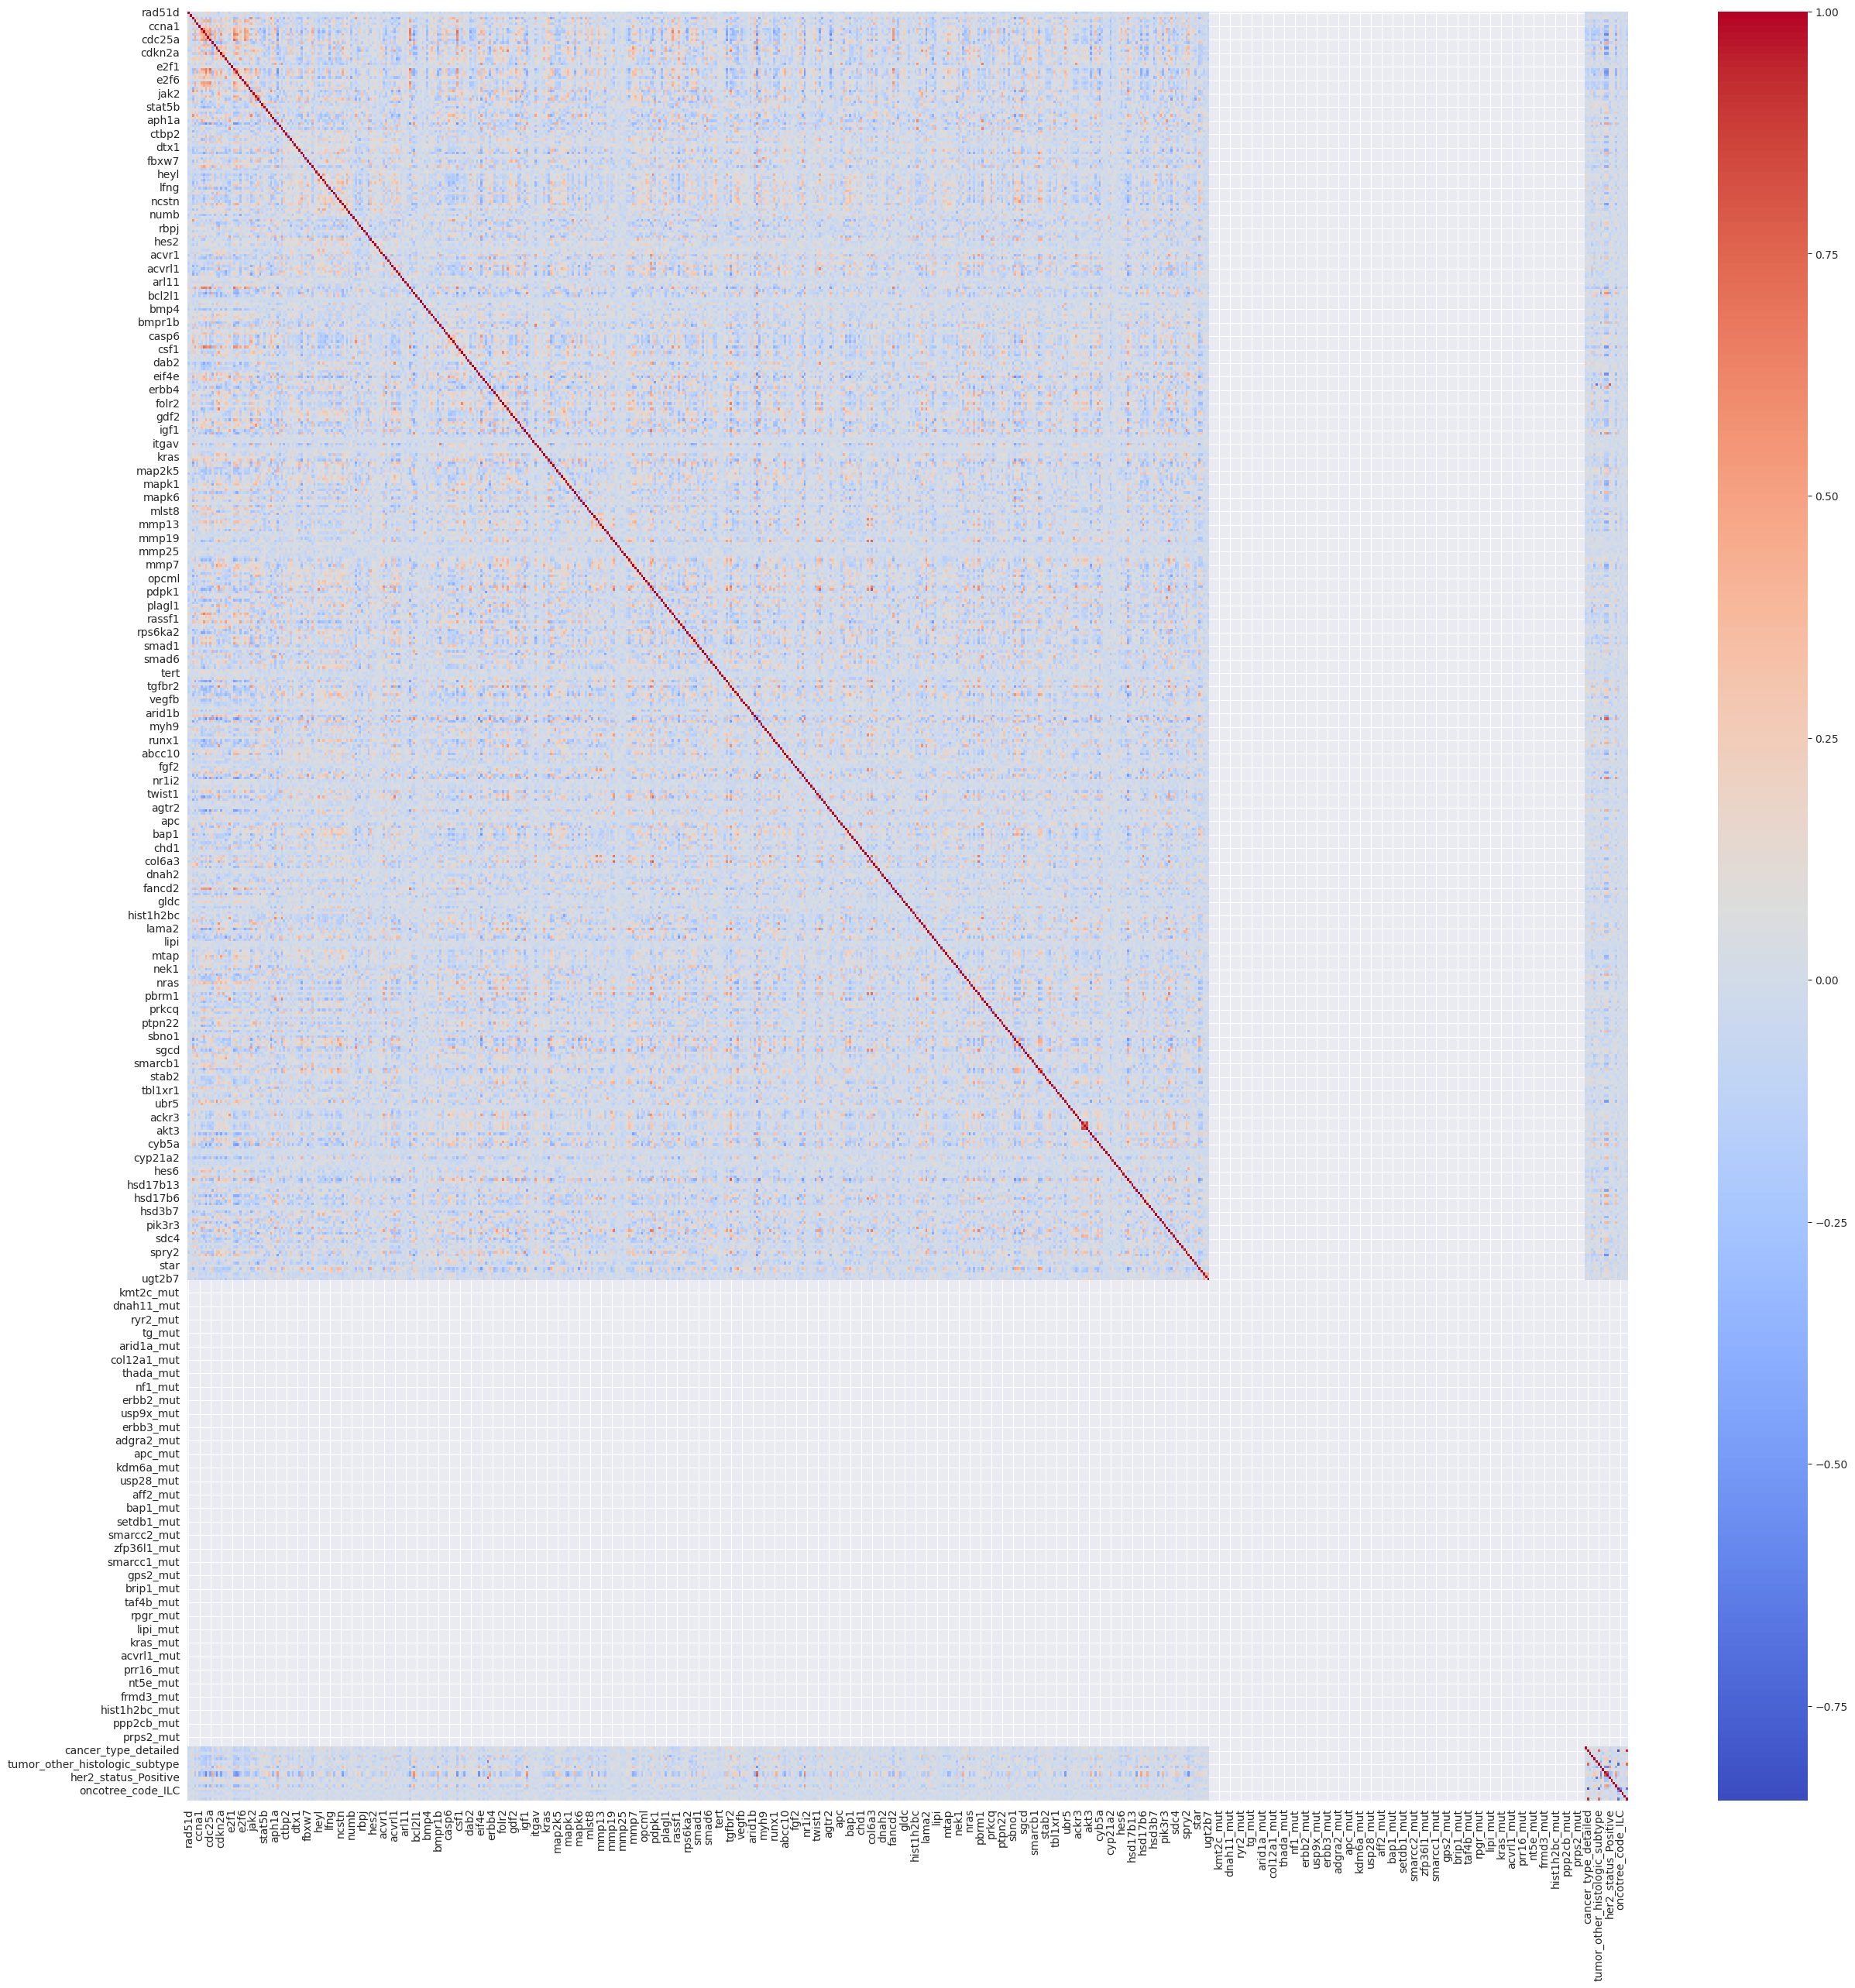

In [96]:
genomic_data = df.loc[:, df.columns[31:]]

genomic_data = genomic_data.apply(pd.to_numeric, errors='coerce')
corr_matrix = genomic_data.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

### ***Checking which features have High Correlation***

In [97]:
corr_matrix = genomic_data.corr().abs()
high_corr_features = np.where(corr_matrix > 0.7)
high_corr_features = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]

print("Features with correlation > 0.7:")
for feature_pair in high_corr_features:
    print(feature_pair[0], "-", feature_pair[1])

Features with correlation > 0.7:
cdk1 - chek1
cdc25a - e2f2
e2f2 - aurka
erbb2 - her2_status_Positive
mmp2 - col6a3
pdgfrb - adgra2
pdgfrb - col6a3
tgfbr2 - hsd17b11
gata3 - er_status_measured_by_ihc_Positve
gata3 - er_status_Positive
col12a1 - col6a3
col6a3 - palld
akr1c2 - akr1c4
akr1c3 - akr1c4
cancer_type_detailed - tumor_other_histologic_subtype
cancer_type_detailed - oncotree_code_IDC
cancer_type_detailed - oncotree_code_MDLC
tumor_other_histologic_subtype - oncotree_code_IDC
tumor_other_histologic_subtype - oncotree_code_MDLC
er_status_measured_by_ihc_Positve - er_status_Positive


In [98]:
corr_matrix = genomic_data.corr().abs()
high_corr_features = np.where(corr_matrix > 0.9)
high_corr_features = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]

print("Features with correlation > 0.9:")
for feature_pair in high_corr_features:
    print(feature_pair[0], "-", feature_pair[1])

Features with correlation > 0.9:
cancer_type_detailed - oncotree_code_MDLC


### ***Checking if Genomic Data is Linear or not***

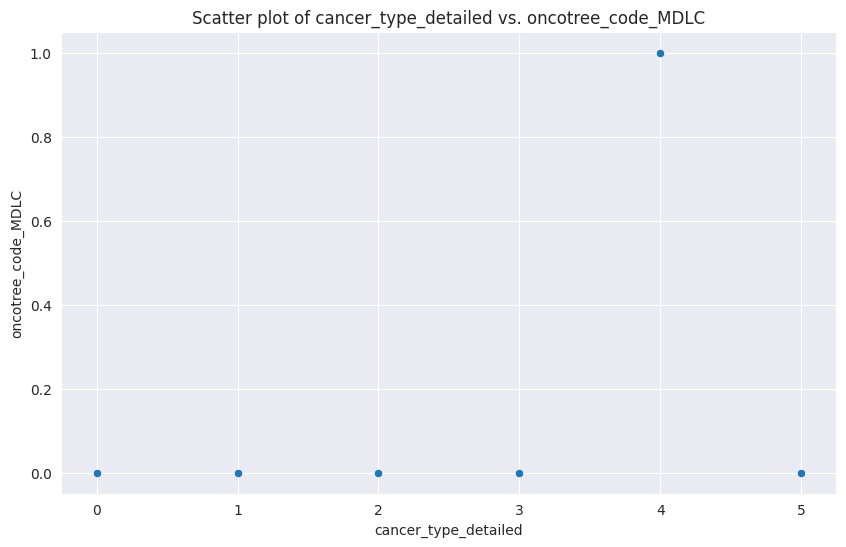

In [99]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(x='cancer_type_detailed', y='oncotree_code_MDLC', data= genomic_data)

plt.title('Scatter plot of cancer_type_detailed vs. oncotree_code_MDLC')
plt.xlabel('cancer_type_detailed')
plt.ylabel('oncotree_code_MDLC')

plt.show()

### ***Feature Selection for Genomic Data***

In [100]:
X_genomic = new_df[genomic_col].astype('int64')
y = new_df['death_from_cancer']

estimator = RandomForestClassifier(n_estimators=500)
rfe = RFE(estimator=estimator, n_features_to_select=100)

X_genomic_reduced = rfe.fit_transform(X_genomic, y)

In [101]:
print("Feature rankings:")
print(rfe.ranking_)

Feature rankings:
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 11 10  1
  1  1 13  3  1 15 16  6 12  1  1  9  4  5  2  1 19 24 18 32 21 23  7 27
 17 26 20 44 22 34 14 38 30 41 29 35 25 36  8 39 37 31 50 53 33 51 42 40
 28 45 43 60 48 47 61 49 56 57 46 63 58 52 59 55 62 66 71 67 54 64 72 65
 69 70 73 68 74]


### ***Concatenating the Selected Features with our DF***

In [102]:
X_genomic_reduced_df = pd.DataFrame(X_genomic_reduced, columns=X_genomic.columns[rfe.support_])

In [103]:
X_genomic_reduced_df.shape

(1904, 100)

In [104]:
genomic_data = df.loc[:, df.columns[31:]]

new_df.drop(genomic_data, axis=1, inplace=True)

In [105]:
new_df = pd.concat([new_df, X_genomic_reduced_df], axis=1)

In [106]:
new_df.shape

(1904, 131)

### **Balancing the Data**

In [107]:
X = new_df

In [108]:
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

In [109]:
print("Samples per class after ADASYN:")
print(y_resampled.value_counts())

Samples per class after ADASYN:
death_from_cancer
1    808
2    802
0    706
Name: count, dtype: int64


### ***Applying MinMax Scaling***

In [110]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

### ***Model***

## ***Splitting the Data in Training and Testing***

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# *Data division in testing and training*

In [118]:
train_death_counts = y_train.value_counts()

print(train_death_counts)

death_from_cancer
1    651
2    630
0    571
Name: count, dtype: int64


In [119]:
death_from_cancer_counts = y_test.value_counts()

print(death_from_cancer_counts)

death_from_cancer
2    172
1    157
0    135
Name: count, dtype: int64


# *Performing Logistic Regression*

In [120]:
lr = LogisticRegression()

start_time = time.time()
lr.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
lr_pred = lr.predict(X_test)
testing_time = time.time() - start_time

lr_cm = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
print("Logistic Regression Confusion Matrix:\n", lr_cm)
print("Logistic Regression Classification Report:\n", lr_report)
print("Logistic Regression Train Score:", lr.score(X_train, y_train))
print("Logistic Regression Test Score:", lr.score(X_test, y_test))
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Logistic Regression Confusion Matrix:
 [[ 82  53   0]
 [ 36 121   0]
 [  0   0 172]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.61      0.65       135
           1       0.70      0.77      0.73       157
           2       1.00      1.00      1.00       172

    accuracy                           0.81       464
   macro avg       0.80      0.79      0.79       464
weighted avg       0.81      0.81      0.81       464

Logistic Regression Train Score: 0.8509719222462203
Logistic Regression Test Score: 0.8081896551724138
Training Time: 0.13 seconds
Testing Time: 0.00 seconds


# *Performing Random Forrest Classification*

In [121]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()
rfc.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = rfc.predict(X_test)
testing_time = time.time() - start_time


print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

train_score = rfc.score(X_train, y_train)
test_score = rfc.score(X_test, y_test)
print(f"\nTraining Score: {train_score:.2f}")
print(f"Testing Score: {test_score:.2f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Confusion Matrix:
 [[ 92  43   0]
 [ 27 130   0]
 [  1   0 171]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       135
           1       0.75      0.83      0.79       157
           2       1.00      0.99      1.00       172

    accuracy                           0.85       464
   macro avg       0.84      0.83      0.84       464
weighted avg       0.85      0.85      0.85       464


Training Score: 1.00
Testing Score: 0.85
Training Time: 0.80 seconds
Testing Time: 0.01 seconds


### ***Results***

**Results of Logistic Regression Model:**

The train score is 0.84, which indicates that the model was able to correctly predict the class of 84.7% of the samples in the training set.

 The test score is 0.80, which indicates that the model was able to correctly predict the class of 80.25% of the samples in the test set.

**Results of Random Forrest Classification Model:**

The train score is 1.00, which indicates that the model was able to correctly predict the class of 100% of the samples in the training set.

The test score is 0.85, which indicates that the model was able to correctly predict the class of 86% of the samples in the test set.